# Giới thiệu 
Bộ dữ liệu này mô tả các hồ sơ y tế cho người Ấn Độ Pima và liệu mỗi bệnh nhân có bị bệnh tiểu đường trong vòng vài năm hay không.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('pima-indians-diabetes.csv')
df.columns=["Pregnancies","Glucose","BloodPressure","SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Class                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


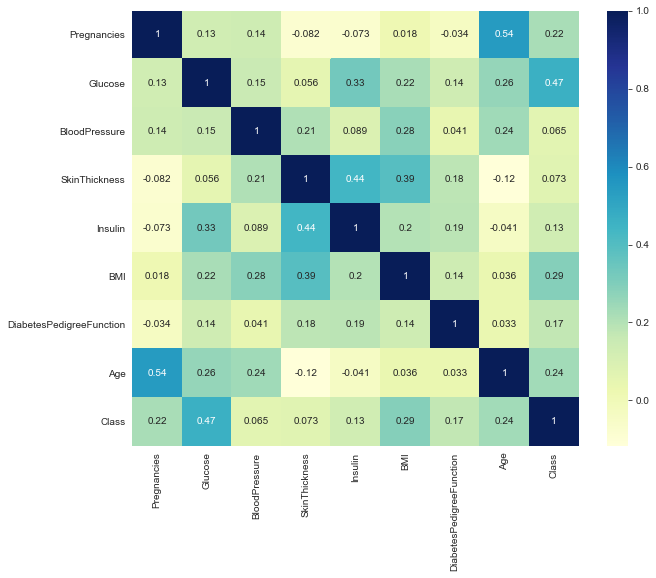

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

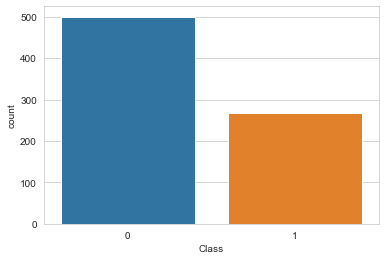

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df)

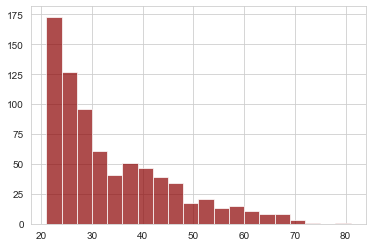

In [18]:
df['Age'].hist(bins=20, color='darkred',alpha=0.7)

In [9]:
X=df.drop('Class', axis=1)
y=df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [13]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [15]:
predictions= nb.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[122  28]
 [ 36  45]]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       150
           1       0.62      0.56      0.58        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231

